In [2]:
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import matplotlib.patches as patches

# Common functions

In [22]:
def read_labels(path):
    labels = list()
    file = open(path, 'r')
    for l in file.readlines():
        aux = l.split('\n')[0]
        aux = aux.split(' ')
        labels.append({
            'class':int(aux[0]),
            'x-center':float(aux[1]),
            'y-center':float(aux[2]),
            'width':float(aux[3]),
            'height':float(aux[4])
        })
    
    return labels

In [23]:
def get_ratio(width, height):
    return ((width*640)/(height*480))

In [24]:
def create_filtered_labels(path, labels):
    text_file = open(path, 'w')
    for label in labels:
        text = f"{label['class']} {label['x-center']} {label['y-center']} {label['width']} {label['height']}"
        text_file.write(text)

In [25]:
def save_bounding_box(path_orig, path_filtered, labels):
    img = Image.open(path_orig)
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    for label in labels:
        x = label['x-center']*640 - (label['width']*640 / 2)
        y = label['y-center']*480 - (label['height']*480 / 2)
        rect = patches.Rectangle((x, y), label['width']*640, label['height']*480, linewidth=1.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.savefig(path_filtered, bbox_inches='tight')
    plt.close()

In [26]:
def print_bounding_box(path_orig, labels):
    img = Image.open(path_orig)
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    for label in labels:
        x = label['x-center']*640 - (label['width']*640 / 2)
        y = label['y-center']*480 - (label['height']*480 / 2)
        rect = patches.Rectangle((x, y), label['width']*640, label['height']*480, linewidth=1.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

In [27]:
# ### Get name of images that have 1 or more labels in it
# labels = os.listdir('./runs/detect/exp4/labels')
# f_names = list()
# for l in labels:
#     f_names.append(l.split('.txt')[0])

# Some Special Cases

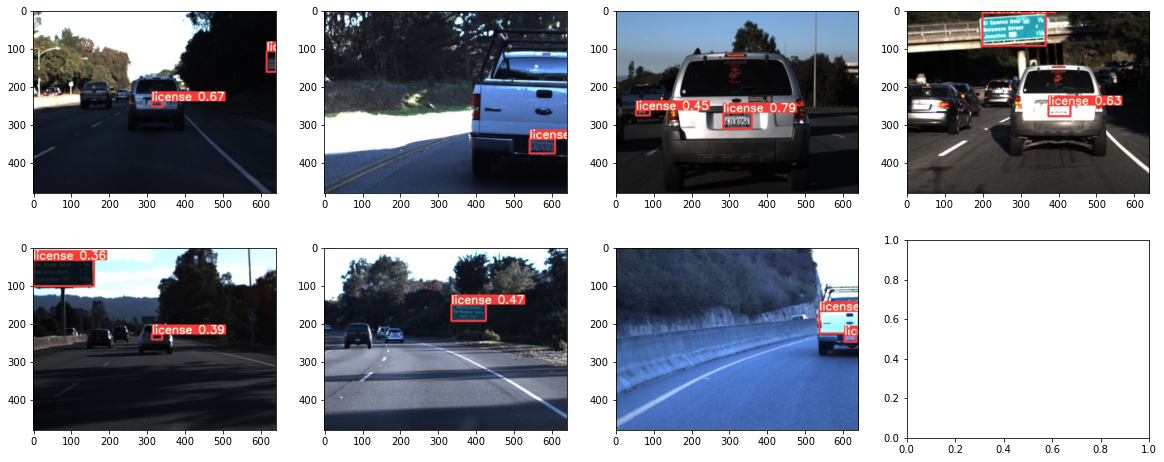

In [20]:
fig, axs = plt.subplots(2,4)
fig.set_figheight(8)
fig.set_figwidth(20)

# 2 labels: 1 license plate and 1 billboard cut
label1 = read_labels('./runs/detect/exp4/labels/1479426552690010257.txt')
image1 = cv2.imread('./runs/detect/exp4/1479426552690010257.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
axs[0,0].imshow(image1)

# 1 big license plate
label2 = read_labels('./runs/detect/exp4/labels/1479424633973570623.txt')
image2 = cv2.imread('./runs/detect/exp4/1479424633973570623.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
axs[0,1].imshow(image2)

# 2 labels: 1 big and 1 small license plate
label3 = read_labels('./runs/detect/exp4/labels/1479426263239499286.txt')
image3 = cv2.imread('./runs/detect/exp4/1479426263239499286.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
axs[0,2].imshow(image3)

# 2 labels: 1 medium size license plate and 1 billboard
label4 = read_labels('./runs/detect/exp4/labels/1479426476826854966.txt')
image4 = cv2.imread('./runs/detect/exp4/1479426476826854966.jpg')
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
axs[0,3].imshow(image4)

# 2 labels: one is a billboard -> we should remove this label
label5 = read_labels('./runs/detect/exp4/labels/1479424301745669454.txt')
image5 = cv2.imread('./runs/detect/exp4/1479424301745669454.jpg')
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)
axs[1,0].imshow(image5)

# 1 label: billboard
label6 = read_labels('./runs/detect/exp4/labels/1479424336851998887.txt')
image6 = cv2.imread('./runs/detect/exp4/1479424336851998887.jpg')
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2RGB)
axs[1,1].imshow(image6)

# 2 label: 1 license plate and 1 weird thing
label7 = read_labels('./runs/detect/exp4/labels/1479424808953529373.txt')
image7 = cv2.imread('./runs/detect/exp4/1479424808953529373.jpg')
image7 = cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)
axs[1,2].imshow(image7)

# Clean YOLO outputs
1) Get name of images that has been labeled inside the /runs/detect/expX/labels/
2) Delete all images that does not have a tag inside /runs/detect/expX/

In [ ]:
# for img in os.listdir('./runs/detect/exp4/'):
#     i_name = img.split('.jpg')[0]
#     if i_name not in f_names and i_name != 'labels':
#         os.remove('./runs/detect/exp4/' + i_name + '.jpg')

# Filter labels
3) Filter labels to discard the ones from wrong objects that do not fulfill the requirement of aspect-ratio and max height
4) Save filtered labels inside /runs/detect/expX_filtered/labels/

In [32]:
labels_with_filter = 0
filtered_labels = list()
for l in os.listdir('./runs/detect/exp4/labels/'):
    aux = read_labels('./runs/detect/exp4/labels/'+l)
    flag = False
    aux_labels = list()
    for i in aux:
        aspect = get_ratio(i['width'], i['height'])
        ### Aspect ratio >= 1.5 and max height of 40
        if i['height'] * 480 <= 40. and aspect >= 1.5:
            filtered_labels.append(i)
            aux_labels.append(i)
            flag = True
    if flag:
        labels_with_filter += 1
        create_filtered_labels('./runs/detect/exp4_filtered/labels/'+l, aux_labels)
        ### Uncomment the following 3 lines if you want to save the filtered images with the bounding box printed
        # save_bounding_box('/Data/Downloads/Ch2_002_IMG/center/'+l.split('.txt')[0]+'.jpg', 
        #     './runs/detect/exp4_filtered/'+l.split('.txt')[0]+'.jpg', 
        #     aux_labels
        # )
        
print(labels_with_filter)

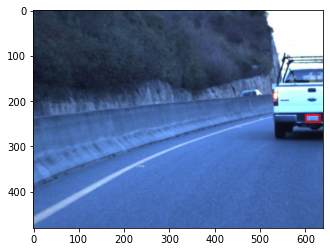

In [28]:
label7_filtered = read_labels('./runs/detect/exp4_filtered/labels/1479424808953529373.txt')
print_bounding_box('/Data/Downloads/Ch2_002_IMG/center/1479424808953529373.jpg', label7_filtered)

There still are some billboards, and there is these kind of shadows that are classified as licenses plates. To mitigate this we can:
1) Train a bigger YOLO model
2) Use a higher prediction probability for licenses plates